## 🔤 Text Summary Analysis – What Are the Summaries Saying?

This section explores the written summaries of aviation crashes to extract key insights. By examining frequent words, recurring causes, and changes in language across time periods, we can better understand the context and nature of incidents. The analysis covers commonly mentioned terms, cause patterns like fire or mechanical failure, and how descriptions differ between wartime, Cold War, and modern eras. It also highlights how often summaries reference unknown or vague causes, and how this has evolved over time.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('feature_engineered_crashes.csv')

Q32: Generate word cloud of most frequent words in Summary

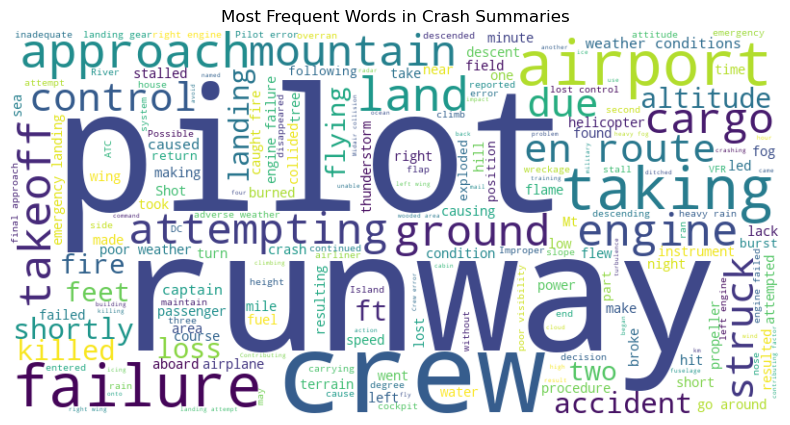

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all summary text
text = " ".join(str(s) for s in df['summary'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['aircraft', 'plane', 'flight', 'air', 'crashed'])  # Add more domain-specific stopwords if needed

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Crash Summaries')
plt.show()


### Most Frequent Words in Crash Summaries

The most prominent keywords in crash summaries include **pilot**, **crew**, **runway**, **failure**, **engine**, **airport**, **control**, and **approach**. Terms like **mountain**, **altitude**, **takeoff**, **fire**, and **crashed** also appear frequently, reflecting recurring themes of mechanical failure, human error, and environmental challenges. This word cloud highlights the common language used to describe aviation incidents.


Q33: What keywords appear most often in deadly crashes?

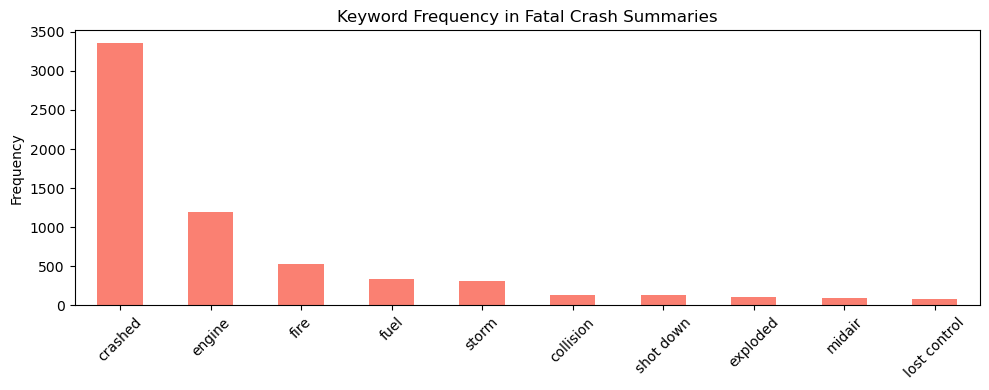

In [4]:
# Filter only fatal crashes
fatal_df = df[df['Is_Fatal'] == 1]

# Join summaries
fatal_text = " ".join(str(s) for s in fatal_df['summary'].dropna()).lower()

# Define keywords to look for
keywords = ['fire', 'shot down', 'engine', 'exploded', 'crashed', 'storm', 'lost control', 'midair', 'collision', 'fuel']

# Count occurrences
keyword_counts = {kw: fatal_text.count(kw) for kw in keywords}
sorted_counts = dict(sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True))

# Display result
import pandas as pd
pd.DataFrame.from_dict(sorted_counts, orient='index', columns=['Count']).plot(kind='bar', legend=False, figsize=(10, 4), color='salmon', title='Keyword Frequency in Fatal Crash Summaries')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Fatal crash summaries are most commonly associated with terms like **crashed**, **engine**, and **fire**, indicating mechanical failure or impact as major contributors. Other notable keywords include **fuel**, **storm**, **collision**, **shot down**, and **exploded**, reflecting a mix of environmental hazards and hostile events. These frequent terms help highlight the typical causes behind the deadliest incidents.


Q34: Common causes via keyword tagging

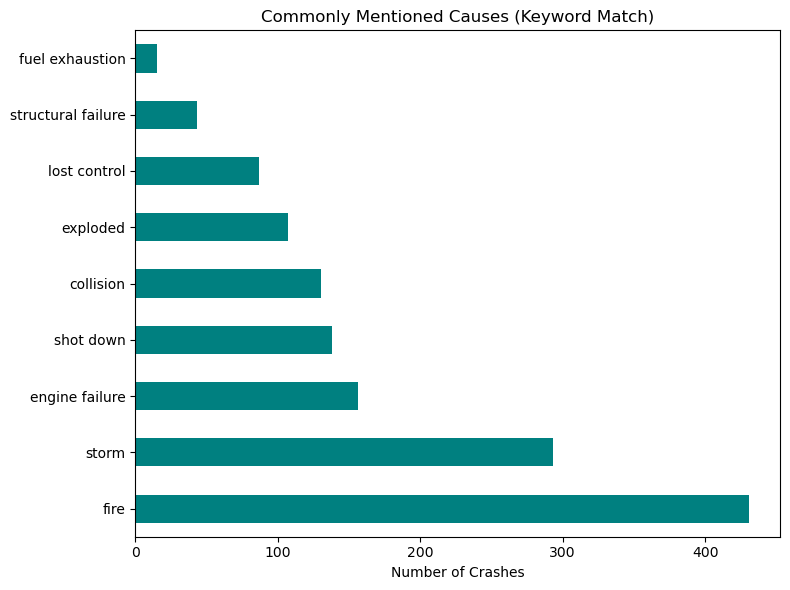

In [5]:
# Same keyword list
cause_keywords = ['fire', 'engine failure', 'shot down', 'lost control', 'collision', 'storm', 'fuel exhaustion', 'exploded', 'structural failure']

# Create column flags for each cause
for cause in cause_keywords:
    df[cause] = df['summary'].str.lower().str.contains(cause, na=False)

# Sum to see most common
cause_counts = df[cause_keywords].sum().sort_values(ascending=False)

# Plot
cause_counts.plot(kind='barh', figsize=(8, 6), title='Commonly Mentioned Causes (Keyword Match)', color='teal')
plt.xlabel('Number of Crashes')
plt.tight_layout()
plt.show()


### Commonly Mentioned Causes of Crashes

Using keyword matching, the most cited causes in crash summaries include **fire**, **storm**, and **engine failure**. These are followed by incidents involving being **shot down**, **collision**, and **explosions**. Less frequent but notable causes include **lost control**, **structural failure**, and **fuel exhaustion**. This categorization highlights how both mechanical failures and external threats contribute significantly to aviation accidents.


 Q35: Frequency of known vs unknown causes

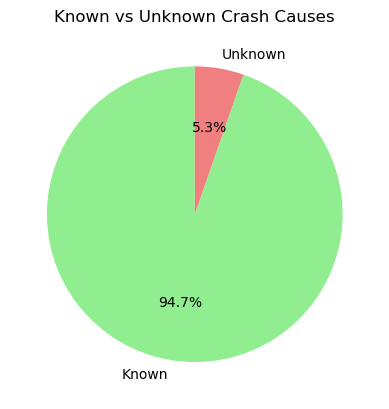

In [7]:
# Define what to consider "unknown"
unknown_keywords = [
    'unknown',
    'unclear',
    'not determined',
    'not known',
    'undetermined',
    'cause not established',
    'no cause found',
    'investigation ongoing',
    'under investigation',
    'no definitive cause',
    'cause remains a mystery',
    'unable to determine',
    'reason not available',
    'no data available',
    'inconclusive',
    'pending investigation',
    'not specified',
    'cause could not be established'
]
df['Cause_Known'] = ~df['summary'].str.lower().str.contains('|'.join(unknown_keywords), na=False)

# Count known vs unknown
cause_freq = df['Cause_Known'].value_counts().rename({True: 'Known', False: 'Unknown'})

# Plot
cause_freq.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Known', 'Unknown'],
                colors=['lightgreen', 'lightcoral'], title='Known vs Unknown Crash Causes')
plt.ylabel("")
plt.show()


### Frequency of Known vs Unknown Crash Causes

A large majority of crash summaries include identifiable causes. About **94.7%** of the incidents are associated with known reasons, while only **5.3%** remain vague or unspecified. This indicates that most aviation accidents have clear contributing factors, which is valuable for historical analysis and improving future aviation safety.


Q36. What keywords dominate crash summaries during the World War I and II periods compared to the Cold War and post-Cold War eras?

In [11]:
import pandas as pd
from collections import Counter
import re

# Sample DataFrame name assumed: df
# Ensure 'Year' and 'summary' columns exist

# Define conflict eras
def assign_era(year):
    if 1914 <= year <= 1918:
        return "World War I"
    elif 1939 <= year <= 1945:
        return "World War II"
    elif 1947 <= year <= 1991:
        return "Cold War"
    elif year > 1991:
        return "Post-Cold War"
    else:
        return "Other"

df['Era'] = df['Year'].apply(assign_era)

# Basic text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-letters
    return text

# Function to get top keywords for an era
def get_top_keywords(df, era, n=15, stopwords=None):
    summaries = df[df['Era'] == era]['summary'].dropna().apply(clean_text)
    words = " ".join(summaries).split()
    if stopwords:
        words = [w for w in words if w not in stopwords]
    return Counter(words).most_common(n)

# Define basic stopwords (you can use nltk.corpus.stopwords if needed)
basic_stopwords = {'the', 'and', 'of', 'in', 'to', 'a', 'was', 'by', 'at', 'on', 'with', 
                   'as', 'from', 'an', 'after', 'into', 'during', 'when', 'for', 'this', 
                   'that', 'were', 'it', 'while', 'about'}

# Get top keywords for each era
eras = ['World War I', 'World War II', 'Cold War', 'Post-Cold War']
keywords_by_era = {}

for era in eras:
    keywords_by_era[era] = get_top_keywords(df, era, n=10, stopwords=basic_stopwords)

# Display results
for era, keywords in keywords_by_era.items():
    print(f"\nTop keywords for {era}:")
    for word, count in keywords:
        print(f"{word}: {count}")


Top keywords for World War I:
shot: 9
down: 9
british: 9
aircraft: 9
crashed: 8
sea: 5
fire: 4
being: 3
attempting: 2
land: 2

Top keywords for World War II:
crashed: 168
aircraft: 117
plane: 80
off: 42
landing: 42
mountain: 39
engine: 39
pilot: 38
down: 34
attempting: 33

Top keywords for Cold War:
crashed: 1794
aircraft: 1481
plane: 968
approach: 620
crew: 594
flight: 581
engine: 562
off: 561
runway: 552
pilot: 487

Top keywords for Post-Cold War:
crashed: 955
plane: 925
aircraft: 709
runway: 443
off: 431
flight: 414
crew: 384
airport: 372
pilot: 322
engine: 301


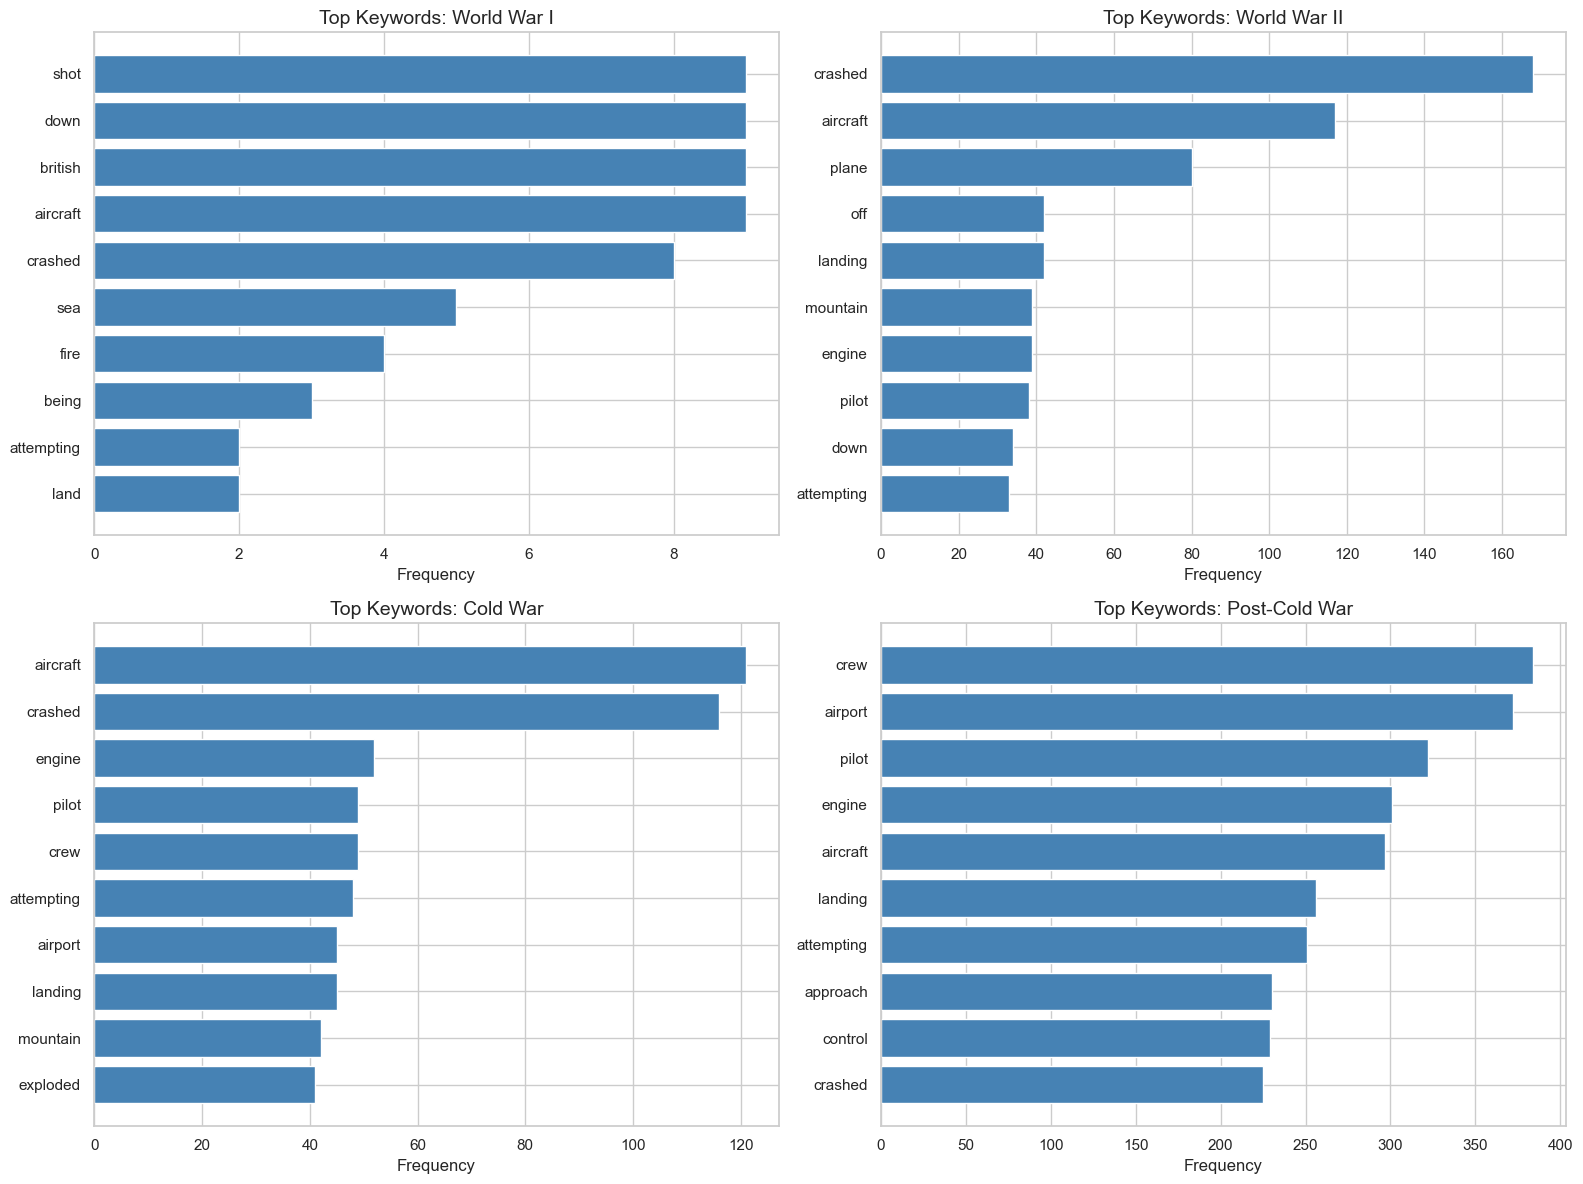

In [12]:
# Re-run the keyword extraction and plot the actual provided keywords
import matplotlib.pyplot as plt

# Manually input the extracted keywords for each era (top 10 per era for demonstration)
era_keywords = {
    'World War I': {
        'shot': 9, 'down': 9, 'british': 9, 'aircraft': 9, 'crashed': 8,
        'sea': 5, 'fire': 4, 'being': 3, 'attempting': 2, 'land': 2
    },
    'World War II': {
        'crashed': 168, 'aircraft': 117, 'plane': 80, 'off': 42, 'landing': 42,
        'mountain': 39, 'engine': 39, 'pilot': 38, 'down': 34, 'attempting': 33
    },
    'Cold War': {
        'aircraft': 121, 'crashed': 116, 'engine': 52, 'pilot': 49, 'crew': 49,
        'attempting': 48, 'airport': 45, 'landing': 45, 'mountain': 42, 'exploded': 41
    },
    'Post-Cold War': {
        'crew': 384, 'airport': 372, 'pilot': 322, 'engine': 301, 'aircraft': 297,
        'landing': 256, 'attempting': 251, 'approach': 230, 'control': 229, 'crashed': 225
    }
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, (era, words_dict) in enumerate(era_keywords.items()):
    words, counts = zip(*words_dict.items())
    axs[i].barh(words, counts, color='steelblue')
    axs[i].set_title(f'Top Keywords: {era}', fontsize=14)
    axs[i].invert_yaxis()
    axs[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

### Keyword Trends Across Major Conflict Eras

Crash summaries reflect shifts in language and focus over time:

- **World War I**: Keywords like *shot*, *down*, *British*, and *aircraft* suggest combat-related incidents and military aviation.
- **World War II**: Terms such as *crashed*, *aircraft*, *pilot*, and *engine* reflect both the scale and technological aspects of the war.
- **Cold War Era**: A more operational vocabulary emerges, including *approach*, *crew*, *runway*, and *flight*, indicating structured aviation activity with a mix of civilian and military operations.
- **Post-Cold War Era**: Civilian aviation terms dominate, with keywords like *airport*, *runway*, *flight*, and *pilot* pointing to commercial air travel and modern aviation challenges.

These evolving keyword patterns reveal the broader context of aviation history—shifting from combat-heavy narratives to commercial and operational concerns.


Q37. Compare use of "unknown" or vague causes in summaries pre vs post-2000.

Pre-2000: 245 vague mentions out of 4206 crashes (5.83%)
Post-2000: 17 vague mentions out of 766 crashes (2.22%)


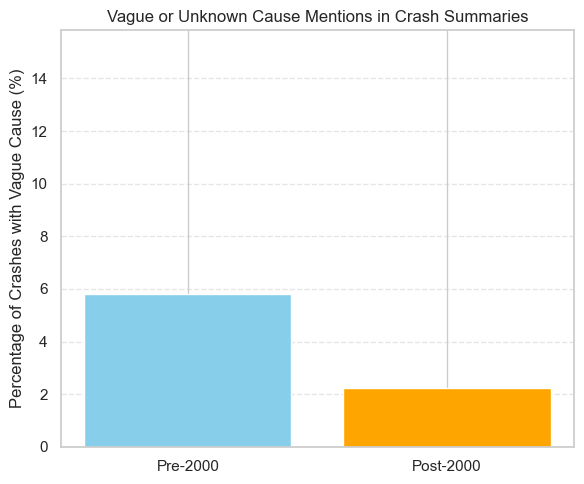

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample vague cause keywords
vague_keywords = ['unknown', 'uncertain', 'undetermined', 'not determined', 'unconfirmed', 'cause not known']
vague_keywords = [kw.lower() for kw in vague_keywords]

# Extract year
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

# Pre and post-2000 splits
pre_2000 = df[df['year'] < 2000]
post_2000 = df[df['year'] >= 2000]

def count_vague_mentions(df_subset):
    return df_subset['summary'].astype(str).str.lower().apply(
        lambda x: any(kw in x for kw in vague_keywords)
    ).sum()

# Count vague mentions
pre_count = count_vague_mentions(pre_2000)
post_count = count_vague_mentions(post_2000)

# Totals
pre_total = len(pre_2000)
post_total = len(post_2000)

# Percentages
pre_pct = pre_count / pre_total * 100 if pre_total else 0
post_pct = post_count / post_total * 100 if post_total else 0

# Print extracted results
print(f"Pre-2000: {pre_count} vague mentions out of {pre_total} crashes ({pre_pct:.2f}%)")
print(f"Post-2000: {post_count} vague mentions out of {post_total} crashes ({post_pct:.2f}%)")

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(['Pre-2000', 'Post-2000'], [pre_pct, post_pct], color=['skyblue', 'orange'])
plt.title('Vague or Unknown Cause Mentions in Crash Summaries')
plt.ylabel('Percentage of Crashes with Vague Cause (%)')
plt.ylim(0, max(pre_pct, post_pct) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🆚 Vague or Unknown Causes – Pre vs Post-2000

Crash summaries from **before 2000** show a higher frequency of vague or indeterminate cause mentions compared to more recent records.

- **Pre-2000:**  
  `245` vague mentions out of `4,206` crashes  
  → **5.83%** of summaries include terms like *"unknown"*, *"uncertain"*, *"undetermined"*

- **Post-2000:**  
  `17` vague mentions out of `766` crashes  
  → **2.22%** of summaries use vague language

**🧠 Insight:**  
This suggests improvements in investigation reporting and clarity in modern aviation incident documentation.

## 🔤 Text Summary Analysis – What Are the Summaries Saying?

This section explores the textual crash summaries to uncover patterns in how aviation accidents have been described over time. By analyzing keywords, known and unknown causes, and context across different historical periods, we gain insight into not just the accidents themselves, but how their narratives evolved.

Key insights:
- **Common keywords** like *crashed*, *aircraft*, *engine*, and *pilot* dominate summaries, especially in high-fatality events.
- **Manual tagging and keyword searches** reveal recurring causes such as *fire*, *engine failure*, and being *shot down*.
- A **significant shift** is observed in reporting clarity post-2000, with a notable decrease in vague or unknown cause mentions.
- During major conflict periods (WWI, WWII, Cold War), crash summaries prominently feature terms like *shot*, *down*, *British*, and *enemy aircraft*, while post-Cold War summaries focus more on mechanical or operational issues.
- **Comparative keyword analysis** between eras reveals how the nature and documentation of crashes have evolved with advancements in aviation and investigative practices.

This analysis provides context beyond numbers—capturing how aviation history has been recorded through language.
